In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

import matplotlib.pyplot as plt
from keras import Sequential 
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
train = pd.read_csv("/content/drive/MyDrive/Digit Recognision/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/content/drive/MyDrive/Digit Recognision/test.csv")

In [4]:
train_labels = train.pop("label").to_numpy()
train_image = train.to_numpy().reshape(-1,28,28,1)
X_test = test.to_numpy().reshape(-1,28,28,1)

In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sample = pd.read_csv("/content/drive/MyDrive/Digit Recognision/sample_submission.csv")

In [7]:
sample.head() 

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


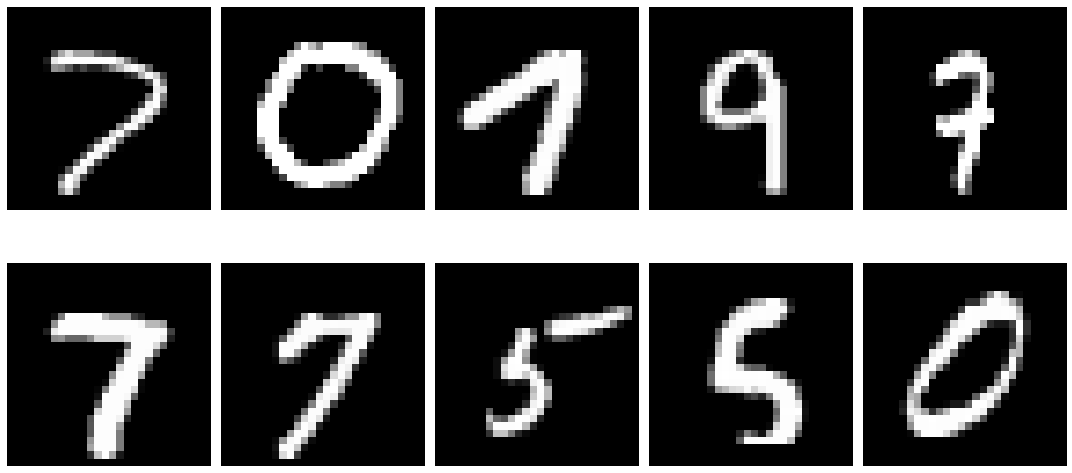

In [17]:
#plotting some images of digit to get intution about the dataset
plt.figure(figsize=(15,8))
for i in range(10):
   plt.subplot(2,5,i+1)
   rand_index = np.random.randint(len(train_image))
   img = train_image[rand_index]
   plt.imshow(img,cmap = "gray")
   plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
X_train, y_train = train_image[:38000], train_labels[:38000]
X_valid, y_valid = train_image[38000:], train_labels[38000:]


In [10]:
model = Sequential([
        Conv2D(32,kernel_size = 5, strides = 2,padding = "same", activation = "relu",input_shape=X_train.shape[-3:]),
        BatchNormalization(),
        MaxPool2D(),
        Conv2D(64,kernel_size=3,padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64,kernel_size=3,padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128,kernel_size=3,padding='same', activation='relu'),
        GlobalAveragePooling2D(),
        Dense(64,activation = 'relu'),
        Dense(10,activation = 'softmax')
])


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

cb = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor='val_accuracy', mode='max'),
    ModelCheckpoint("Model01.h5", save_best_only=True)
]

model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data  = (X_valid,y_valid),
    callbacks = cb
)



Epoch 1/20
1188/1188 [==============================] - 91s 75ms/step - loss: 0.8438 - accuracy: 0.7657 - val_loss: 0.2283 - val_accuracy: 0.9385
Epoch 2/20
1188/1188 [==============================] - 72s 61ms/step - loss: 0.1509 - accuracy: 0.9579 - val_loss: 0.1615 - val_accuracy: 0.9513
Epoch 3/20
1188/1188 [==============================] - 68s 57ms/step - loss: 0.1002 - accuracy: 0.9712 - val_loss: 0.1076 - val_accuracy: 0.9647
Epoch 4/20
1188/1188 [==============================] - 69s 58ms/step - loss: 0.0782 - accuracy: 0.9772 - val_loss: 0.1143 - val_accuracy: 0.9655
Epoch 5/20
1188/1188 [==============================] - 66s 55ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 6/20
1188/1188 [==============================] - 66s 55ms/step - loss: 0.0534 - accuracy: 0.9847 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 7/20
1188/1188 [==============================] - 65s 55ms/step - loss: 0.0465 - accuracy: 0.9866 - val_loss: 0.0724 -

In [11]:
pred = np.argmax(model.predict(X_test),axis = -1)
pred

875/875 [==============================] - 15s 17ms/step


array([2, 0, 9, ..., 3, 9, 2])

In [12]:
sample_sub = pd.read_csv('/content/drive/MyDrive/Digit Recognision/sample_submission.csv')
sample_sub.Label  = pred
sample_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [13]:
sample_sub.to_csv(r"/content/drive/MyDrive/Digit Recognision/sample_sub.csv")